In [115]:
import numpy as np
import typing as ty
import pandas as pd

In [116]:
#熵权法所获得得分数据
y1 = np.array([0.07546937, 0.07499607, 0.07162643, 0.06533721, 0.06432258,
       0.05779781, 0.05522169, 0.0542715 , 0.0525058 , 0.05055008,
       0.04894246, 0.04406747, 0.04284214, 0.04106057, 0.03994967,
       0.03896511, 0.03622915, 0.03599189, 0.0317465 , 0.0181065 ])
x0 = np.array(["K","I","J","L","T","O","B","M","H","Q","G","F","D","C","R","A","E","P","S","N"])
x0,y1

(array(['K', 'I', 'J', 'L', 'T', 'O', 'B', 'M', 'H', 'Q', 'G', 'F', 'D',
        'C', 'R', 'A', 'E', 'P', 'S', 'N'], dtype='<U1'),
 array([0.07546937, 0.07499607, 0.07162643, 0.06533721, 0.06432258,
        0.05779781, 0.05522169, 0.0542715 , 0.0525058 , 0.05055008,
        0.04894246, 0.04406747, 0.04284214, 0.04106057, 0.03994967,
        0.03896511, 0.03622915, 0.03599189, 0.0317465 , 0.0181065 ]))

In [117]:
"""
20条河流的水质情况数据
"""
df = pd.read_excel("20条河流的水质情况数据.xlsx")
"""
原始矩阵正向化
"""
#PH值，中间型指标7
x_best = 7
M = max(np.abs(np.array(df.iloc[:,2])-x_best))
for i in range(df.shape[0]):
    df.iloc[i,2] = 1-abs(df.iloc[i,2]-x_best)/M
#细菌总数，极小型指标
M = max(np.array(df.iloc[:,3]))
for i in range(df.shape[0]):
    df.iloc[i,3] = M-df.iloc[i,3]
#植物性营养物量，区间型指标[10,20]
a = 10
b = 20
M = max(a-min(np.array(df.iloc[:,4])),max(np.array(df.iloc[:,4]))-b)
for i in range(df.shape[0]):
    if df.iloc[i,4]<a:
        df.iloc[i,4] = 1-(a-df.iloc[i,4])/M
    elif df.iloc[i,4]>b:
        df.iloc[i,4] = 1-(df.iloc[i,4]-b)/M
    else:
        df.iloc[i,4] = 1
"""
正向化矩阵标准化
"""
for j in range(1,df.shape[1]):
    x = np.array(df.iloc[:,j])
    x = sum(np.float_power(x,2))**0.5
    for i in range(df.shape[0]):
        df.iloc[i,j] = df.iloc[i,j]/x
df

,河流,含氧量（ppm),PH值,细菌总数(个/mL),植物性营养物量（ppm)
0,A,0.162186,0.248255,0.024544,0.306458
1,B,0.070200,0.140837,0.286347,0.212693
2,C,0.315035,0.181417,0.065451,0.277586
3,D,0.297744,0.334190,0.065451,0.136145
4,E,0.246564,0.226772,0.032725,0.211898
5,F,0.082649,0.291223,0.130902,0.184086
6,G,0.265930,0.295997,0.130902,0.200773
7,H,0.321605,0.300771,0.220896,0.000000
8,I,0.188468,0.198127,0.400886,0.306458
9,J,0.214058,0.281674,0.302710,0.240504


In [118]:
#取出母序列
y = df.iloc[:,1:].max(axis=1)
#预处理
y /= y.mean()
df['含氧量（ppm)'] /= df['含氧量（ppm)'].mean()
df['PH值'] /= df['PH值'].mean()
df['细菌总数(个/mL)'] /= df['细菌总数(个/mL)'].mean()
df['植物性营养物量（ppm)'] /= df['植物性营养物量（ppm)'].mean()
#计算各个指标与母序列的关联系数
df['含氧量（ppm)'] = (y - df['含氧量（ppm)']).abs()
df['PH值'] = (y - df['PH值']).abs()
df['细菌总数(个/mL)'] = (y - df['细菌总数(个/mL)']).abs()
df['植物性营养物量（ppm)'] = (y - df['植物性营养物量（ppm)']).abs()
a = min(df['含氧量（ppm)'].min(),df['PH值'].min(),df['细菌总数(个/mL)'].min(),df['植物性营养物量（ppm)'].min())
b = max(df['含氧量（ppm)'].max(),df['PH值'].max(),df['细菌总数(个/mL)'].max(),df['植物性营养物量（ppm)'].max())
print(f"a={a},\nb={b}")
p = 0.5#分辨系数
df['含氧量（ppm)'] = (a+p*b)/(df['含氧量（ppm)']+p*b)
df['PH值'] = (a+p*b)/(df['PH值']+p*b)
df['细菌总数(个/mL)'] = (a+p*b)/(df['细菌总数(个/mL)']+p*b)
df['植物性营养物量（ppm)'] = (a+p*b)/(df['植物性营养物量（ppm)']+p*b)
coef = [df['含氧量（ppm)'].sum()/df.shape[0],df['PH值'].sum()/df.shape[0],df['细菌总数(个/mL)'].sum()/df.shape[0],df['植物性营养物量（ppm)'].sum()/df.shape[0]]
coef

a=0.0011310789854513947,
b=1.066275486876704


[0.6518920753695294,
 0.6108445260470303,
 0.5092499640103099,
 0.6422782302886538]

In [119]:
#权重计算
w = coef/sum(coef)
#计算得分
df['Score'] = 0
for i in range(df.shape[0]):
    df.iloc[i,df.shape[1]-1]=sum(w*df.iloc[i,1:5])
df['Score']/=sum(df['Score'])
df


,河流,含氧量（ppm),PH值,细菌总数(个/mL),植物性营养物量（ppm),Score
0,A,0.697398,0.722088,0.377665,0.525462,0.048489
1,B,0.467198,0.677314,0.463266,0.855392,0.051145
2,C,0.529100,0.781052,0.438326,0.630749,0.049333
3,D,0.619245,0.498744,0.416619,0.548023,0.043283
4,E,0.589586,0.641649,0.456155,0.709897,0.049816
5,F,0.485869,0.533178,0.683916,0.893669,0.053223
6,G,0.639240,0.529119,0.670333,1.000000,0.058627
7,H,0.523942,0.563370,0.788444,0.334041,0.044279
8,I,0.561051,0.602761,0.381261,0.759244,0.048156
9,J,0.948847,0.582672,0.449455,0.756285,0.057454


['K' 'I' 'J' 'L' 'T' 'O' 'B' 'M' 'H' 'Q' 'G' 'F' 'D' 'C' 'R' 'A' 'E' 'P'
 'S' 'N']


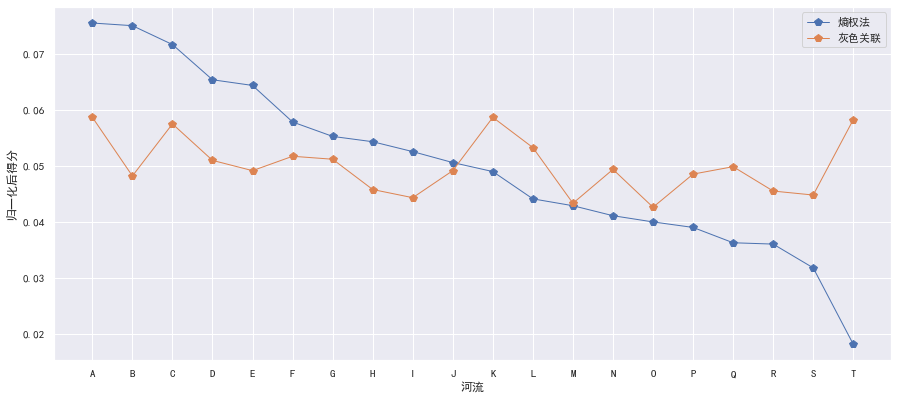

In [120]:
y2 = []
print(x0)
for i in x0:
    for j in range(df.shape[0]):
        if df.iloc[j,0]==i:
            y2.append(df.iloc[j,5])
#绘图
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib.pyplot import rcParams
%matplotlib inline
sns.set_theme(style="darkgrid")
# 设定整个画布的尺寸
fig = plt.figure(figsize=(15,6.5))
#设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#设置x轴刻度间隔
# x_major_locator=MultipleLocator(25)
# ax = plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel("河流")
plt.ylabel("归一化后得分")
# plt.title("")
#绘图数据
x,y = df['河流'],df['Score']
plt.plot(x,y1,'-p',label="熵权法",linewidth=1,markersize=8)
plt.plot(x,y2,'-p',label="灰色关联",linewidth=1,markersize=8)
plt.legend()
plt.savefig("灰色关联与熵权法比较.jpg",format = 'jpg')